In [1]:
import numpy as np
from tqdm import tqdm
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import cPickle as pickle
%matplotlib nbagg
import matplotlib.pyplot as plt

In [2]:
vectores = pickle.load(open("embedding_vectors_K2.p", "rb"))
dict_nombres_sku = pickle.load(open("sku_desc_dict.p", "rb"))

In [3]:
cargar_data = True
construir_listados_ordenados = False

if not cargar_data:
    # transformar diccionario de productos
    if construir_listados_ordenados:
        # campo indice me indica el orden de los productos
        nombres = []
        categorias = []
        for i in tqdm(xrange(len(dict_nombres_sku))):
            for (sku, values) in dict_nombres_sku.iteritems():
                if values['indice'] == i:
                    try:
                        nombres.append(unicode(values['DESC_PRODUC'].strip(), errors='ignore'))
                    except:
                        if str(values['DESC_PRODUC']) == 'nan':
                            continue
                        else:
                            nombres.append(str(values['DESC_PRODUC']))
                    categorias.append(values['COD_NIVEL_D'])
                    break
    else:
        nombres = [unicode(dict_nombres_sku[i]['DESC_PRODUC'].strip(), errors='ignore') for i in xrange(len(vectores))]
        categorias = np.array([dict_nombres_sku[i]['COD_NIVEL_D'] for i in xrange(len(vectores))])
    pickle.dump(nombres, open("nombres_list.p", "wb"))
    pickle.dump(categorias, open("categorias_list.p", "wb"))
else:
    nombres = pickle.load(open("nombres_list.p", "rb"))
    categorias = pickle.load(open("categorias_list.p", "rb"))

In [4]:
print("Número de productos: {:,}".format(len(nombres)))

assert len(nombres) == len(categorias)
assert len(nombres) == len(vectores)

Número de productos: 104,176


In [5]:
pca = True
# T-SNE
if not pca:
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=300, random_state=2112, verbose=1)
    # entrenar modelo para reducir dimensiones
    new_values = tsne_model.fit_transform(vectores)

In [6]:
# PCA
if pca:
    pca = PCA(n_components=2)
    pca.fit(vectores)
    print pca.explained_variance_ratio_
    new_values = pca.transform(vectores)

[ 0.73434441  0.26565559]


<IPython.core.display.Javascript object>


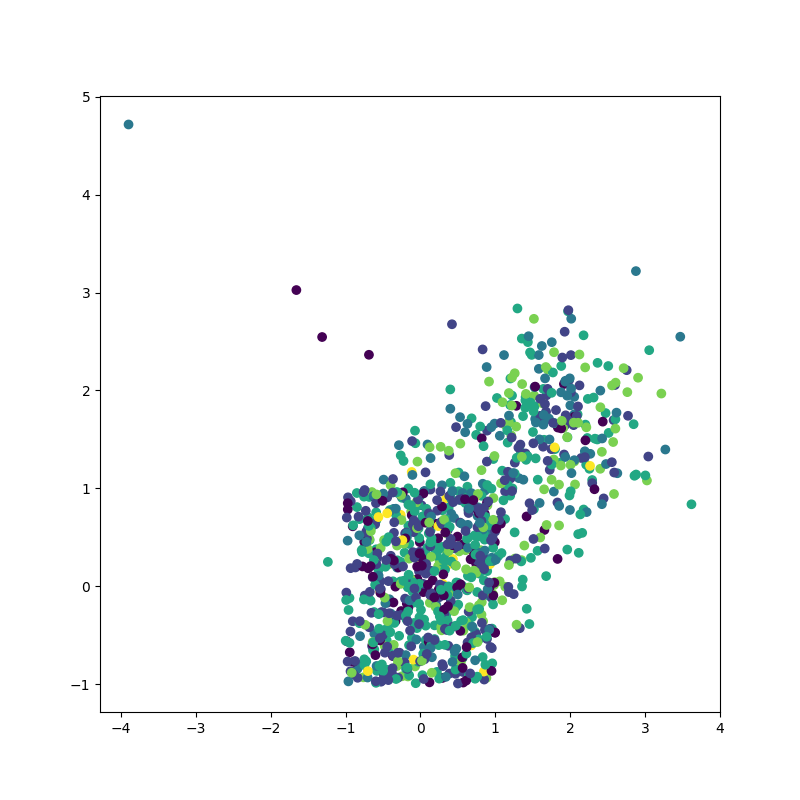

In [16]:
algunos_nombres = False
cuantos_nombres = 2000

xs = []
ys = []
cs = []
for i, value in enumerate(vectores[:1000]):
    xs.append(value[0])
    ys.append(value[1])
    cs.append(categorias[i])

plt.figure(figsize=(8, 8)) 

plt.scatter(xs, ys, c=cs)

# agregar algunos nombres?
if algunos_nombres:
    for i in range(len(xs))[:cuantos_nombres]:
        color = categorias[i]#/5.0
        #plt.scatter(xs[i],ys[i], c=color, cmap=plt.cm.cool)
        plt.annotate((' ').join(nombres[i].split()[0:3]),
                     xy=(xs[i], ys[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
plt.show()